# Exploring $\Omega_b$ and $H_0$

In [30]:
# imports
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from astropy.cosmology import Planck18
from astropy.cosmology import FlatLambdaCDM
from astropy import constants
from astropy import units

from frb.dm import igm
from frb.figures import utils as frbfig_utils

In [19]:
sns.set_style("darkgrid")
#sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Standard Macquart Relation

## Fix $n_e$ at $z=0$

In [2]:
n_e_z0 = igm.ne_cosmic(0., cosmo=Planck18)
n_e_z0

<Quantity [1.8592582e-07] 1 / cm3>

## $z$

In [3]:
zeval, dz = np.linspace(0., 1., 10000, retstep=True)

## Cosmology

In [4]:
denom = Planck18.H(zeval) * (1+zeval) * (1+zeval)

## Sum

In [36]:
DM_cum_18 = (constants.c * np.cumsum(n_e_z0 * dz / denom)).to('pc/cm**3')

## Function

In [38]:
def DM_cum(zeval, dz, ne=n_e_z0, cosmo=Planck18):
    denom = cosmo.H(zeval) * (1+zeval) * (1+zeval)
    return (constants.c * np.cumsum(ne * dz / denom)).to('pc/cm**3')

## Plot

/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/seaborn-0.11.0-py3.8.egg/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '${\\rm DM}_{\\rm cosmic} \\;\\; \\rm [pc/cm^{3}]$')

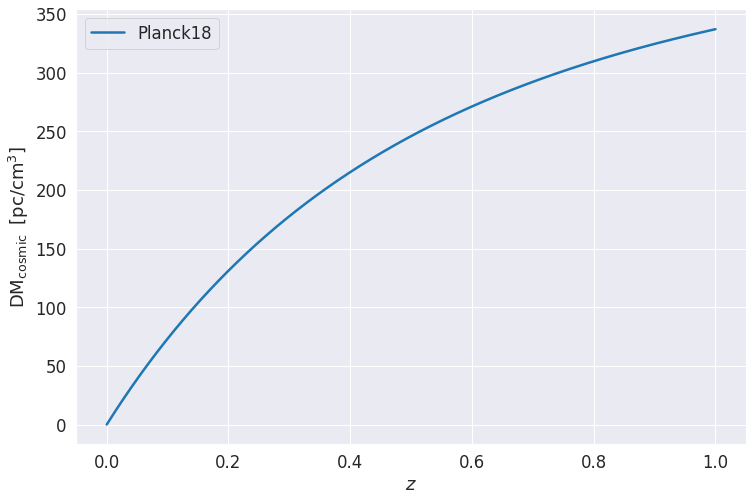

In [37]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
_ = sns.lineplot(zeval, DM_cum_18, ax=ax, label='Planck18')
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'${\rm DM}_{\rm cosmic} \;\; \rm [pc/cm^{3}]$')
#
#frbfig_utils.set_fontsize(ax, 15.)

# Modifying $H_0$

## Increase $H_0$

### Modify the cosmology

In [27]:
Planck18.H0

<Quantity 67.66 km / (Mpc s)>

In [31]:
Omb_H02_Planck = Planck18.Ob0 * (Planck18.H0.value)**2
Omb_H02_Planck

224.17856813199998

In [29]:
H0_high = 75. * units.km/units.Mpc/units.s

In [33]:
Omegab_high = Planck18.Ob0 * (Planck18.H0/H0_high)**2
Omegab_high

<Quantity 0.03985397>

### We will *not* change $\Omega_m$, but we could..

In [35]:
cosmo_high = FlatLambdaCDM(H0=H0_high, Ob0=Omegab_high, Om0=Planck18.Om0)

### Calculation time

In [39]:
DM_cum_high = DM_cum(zeval, dz, ne=n_e_z0, cosmo=cosmo_high)

/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/seaborn-0.11.0-py3.8.egg/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/seaborn-0.11.0-py3.8.egg/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '${\\rm DM}_{\\rm cosmic} \\;\\; \\rm [pc/cm^{3}]$')

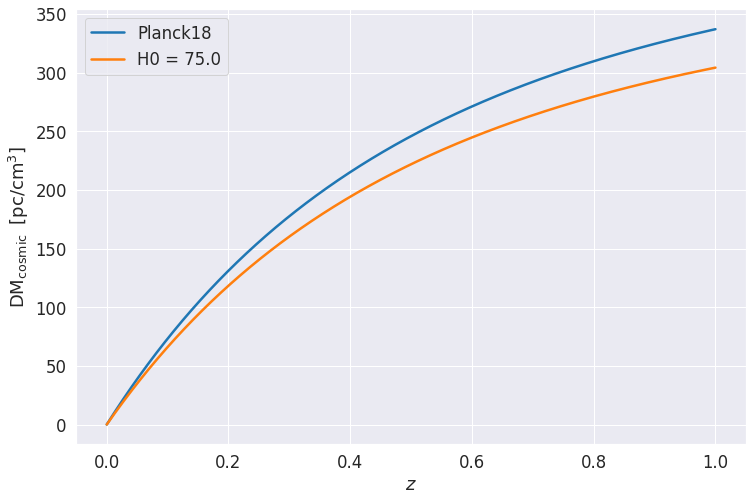

In [40]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
# Planck 18
_ = sns.lineplot(zeval, DM_cum_18, ax=ax, label='Planck18')
# High
_ = sns.lineplot(zeval, DM_cum_high, ax=ax, label=f'H0 = {H0_high.value}')
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'${\rm DM}_{\rm cosmic} \;\; \rm [pc/cm^{3}]$')

## Lower $H_0$

In [45]:
H0_low = 60. * units.km/units.Mpc/units.s

In [46]:
Omegab_low = Planck18.Ob0 * (Planck18.H0/H0_low)**2
Omegab_low

<Quantity 0.06227182>

In [47]:
cosmo_low = FlatLambdaCDM(H0=H0_low, Ob0=Omegab_low, Om0=Planck18.Om0)
DM_cum_low = DM_cum(zeval, dz, ne=n_e_z0, cosmo=cosmo_low)

### Plot

/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/seaborn-0.11.0-py3.8.egg/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/seaborn-0.11.0-py3.8.egg/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/seaborn-0.11.0-py3.8.egg/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing oth

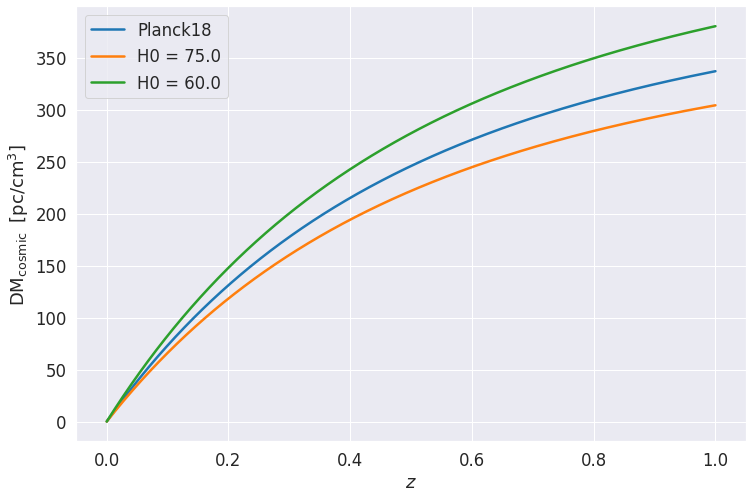

In [49]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
# Planck 18
_ = sns.lineplot(zeval, DM_cum_18, ax=ax, label='Planck18')
# High
_ = sns.lineplot(zeval, DM_cum_high, ax=ax, label=f'H0 = {H0_high.value}')
# Low
_ = sns.lineplot(zeval, DM_cum_low, ax=ax, label=f'H0 = {H0_low.value}')
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'${\rm DM}_{\rm cosmic} \;\; \rm [pc/cm^{3}]$')
plt.savefig('Macquart_vs_H0.png')